## Appliances Energy Consumption Prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\akash\OneDrive\Documents\dataset\kaggle dataset\Appliances Energy Consumption.zip",parse_dates=['date'])
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
df.shape

(19735, 29)

In [4]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [6]:
df.describe()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,2016-03-20 05:30:00,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,2016-02-14 23:15:00,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,2016-03-20 05:30:00,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,2016-04-23 11:45:00,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,2016-05-27 18:00:00,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634


In [7]:
import matplotlib.pyplot as plt

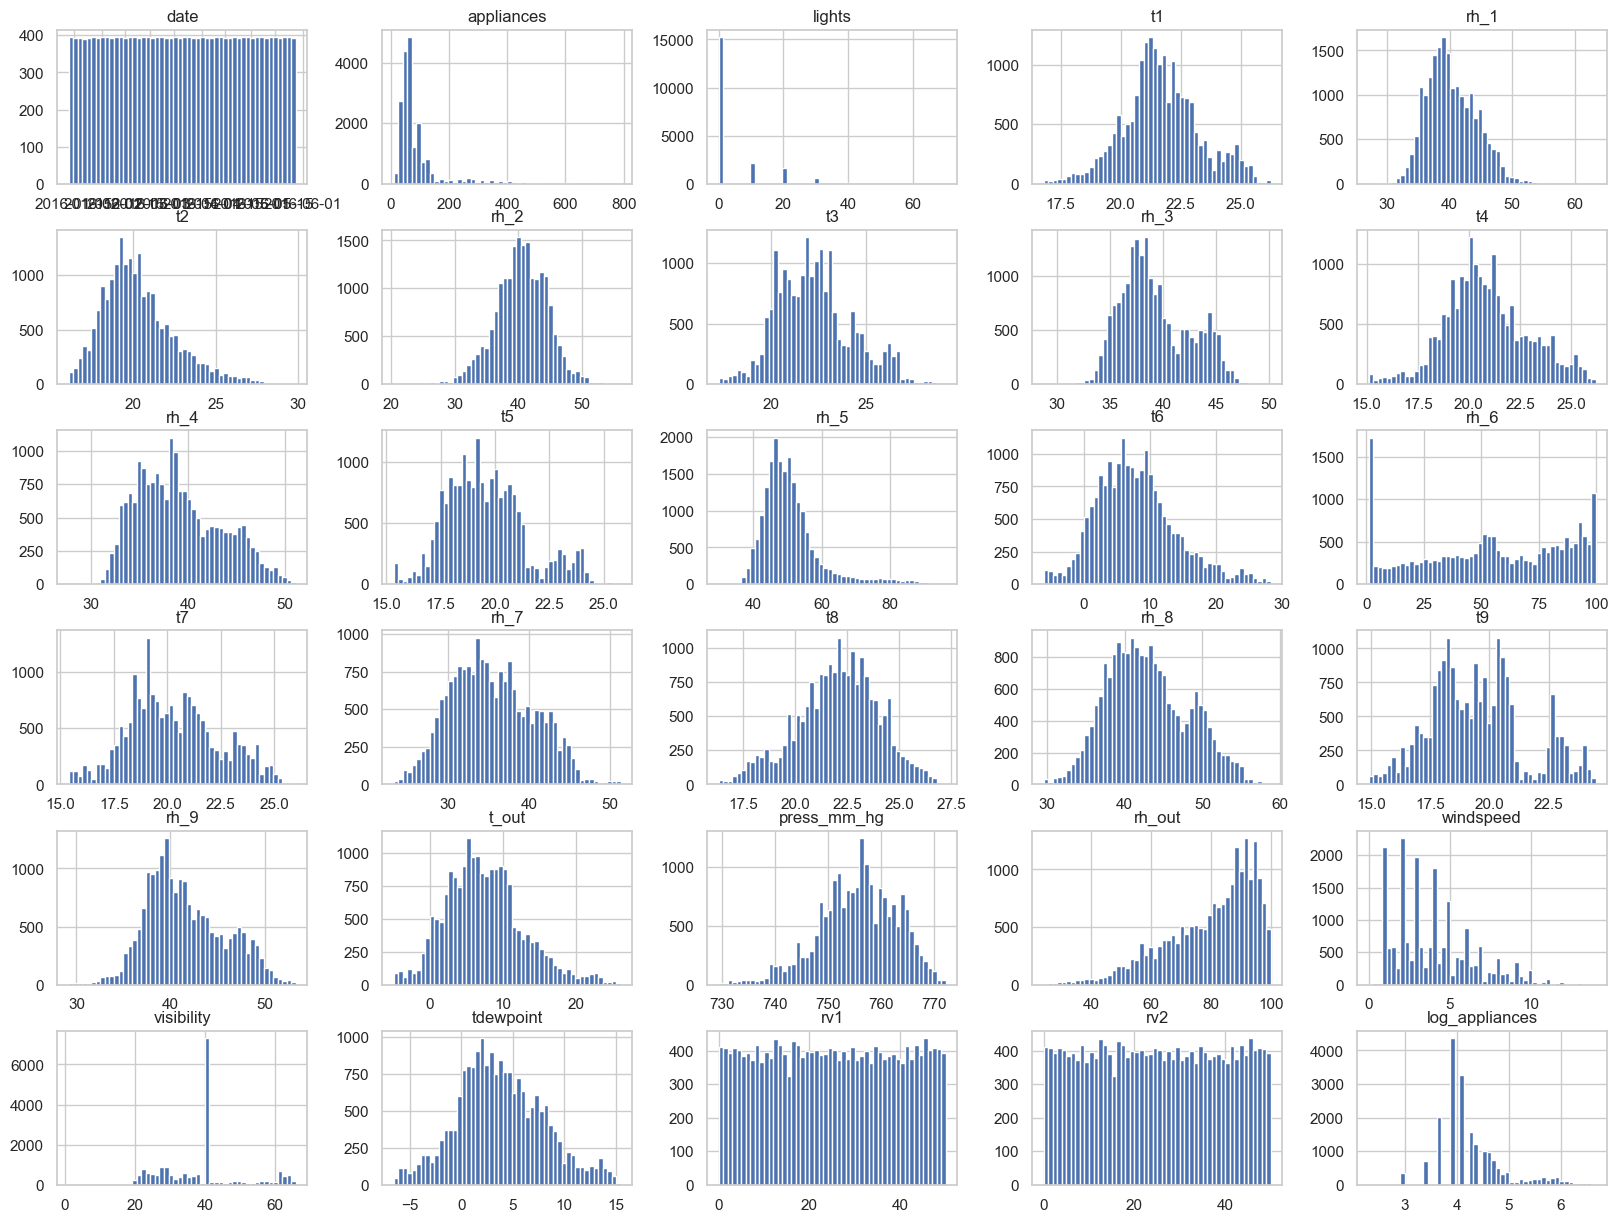

In [36]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("atribute_histogram_points")
plt.show()

In [9]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
df.columns = [x.lower() for x in df.columns]

In [16]:
df = df.set_index('date')

In [12]:
df.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [11]:
df.corr()

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,1.000000,-0.009630,-0.189835,0.696974,-0.102760,0.515321,-0.092945,0.792938,-0.431939,0.781954,...,0.888546,-0.244647,0.588861,-0.026770,-0.336362,-0.257415,-0.096214,0.468731,0.000277,0.000277
appliances,-0.009630,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,-0.189835,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
t1,0.696974,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
rh_1,-0.102760,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
t2,0.515321,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
rh_2,-0.092945,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
t3,0.792938,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
rh_3,-0.431939,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
t4,0.781954,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815


In [18]:
import seaborn as sns

In [19]:
# sns.pairplot(df)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#  corrmap = df.corr()
# top_corr_features = corrmap.index
# plt.figure(figsize=(20,20))
# #making of heatmap
# df_heatmap = sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlGn")

In [22]:
sorted_appliances = df.sort_values('appliances',ascending=False)
sorted_appliances.head()

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
731,2016-01-16 18:50:00,1080,30,21.930000,42.766667,21.040000,38.080000,20.700000,40.633333,20.89,...,17.79,40.672500,2.083333,765.033333,85.500000,3.666667,40.000000,-0.083333,27.408521,27.408521
1451,2016-01-21 18:50:00,1070,30,19.600000,34.300000,18.426667,33.963333,18.390000,36.930000,17.70,...,16.00,36.930000,-0.616667,764.533333,82.833333,1.000000,64.166667,-3.216667,11.735734,11.735734
432,2016-01-14 17:00:00,910,0,21.463333,41.693333,20.856667,38.363333,21.666667,43.930000,18.70,...,17.00,43.466667,4.600000,747.900000,76.000000,7.000000,40.000000,0.700000,18.937972,18.937972
12088,2016-04-04 15:40:00,900,0,23.000000,43.166667,22.200000,40.426667,26.100000,38.930000,21.60,...,20.70,43.333333,14.766667,749.266667,59.666667,7.000000,40.000000,7.000000,15.105153,15.105153
1452,2016-01-21 19:00:00,890,20,19.730000,37.863333,18.566667,34.090000,18.390000,36.863333,17.60,...,16.00,36.730000,-0.800000,764.500000,84.000000,1.000000,64.000000,-3.200000,3.221583,3.221583


In [23]:
len(sorted_appliances.head(len(sorted_appliances)//1000))

19

In [24]:
sorted_appliances.appliances[19]

140

The number of the 0,1% top values of appliances' load is  19 and they have power load higher than 140 Wh,


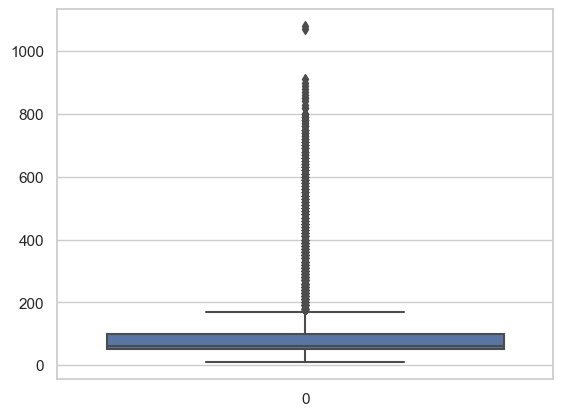

In [25]:
sorted_appliances = df.sort_values('appliances',ascending=False)
print("The number of the 0,1% top values of appliances' load is ",
     len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
     sorted_appliances.appliances[19],"Wh,")

#boxplot appliances
sns.set(style = "whitegrid")
ax = sns.boxplot(sorted_appliances.appliances)

In [26]:
df = df.dropna()
df = df.drop(df[(df.appliances>790)|(df.appliances<0)].index)

In [27]:
sorted_appliances = df.sort_values('appliances',ascending=False)
sorted_appliances.head()

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
868,2016-01-17 17:40:00,790,10,21.566667,38.626667,20.10,37.040909,20.790000,37.260000,21.066667,...,18.10,37.290000,-0.266667,764.833333,79.666667,2.000000,40.000000,-3.466667,36.170216,36.170216
18820,2016-05-21 09:40:00,790,0,23.000000,50.260000,25.53,43.133333,24.390000,44.490000,23.600000,...,23.00,47.462500,16.900000,756.333333,79.666667,4.666667,28.333333,13.333333,44.856357,44.856357
443,2016-01-14 18:50:00,790,10,22.166667,40.500000,21.70,38.626667,22.166667,42.133333,18.790000,...,16.89,42.326667,4.083333,748.433333,76.833333,6.833333,40.000000,0.350000,30.487447,30.487447
12068,2016-04-04 12:20:00,790,0,22.390000,45.563333,22.39,42.966667,25.000000,41.433333,21.600000,...,20.60,44.433333,13.466667,749.866667,68.666667,7.000000,40.000000,7.766667,4.089491,4.089491
15664,2016-04-29 11:40:00,780,0,20.133333,37.333333,18.26,39.590000,21.890000,34.260000,19.500000,...,18.60,36.466667,7.233333,755.233333,89.000000,4.333333,26.000000,5.500000,44.465602,44.465602


In [28]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
df['hour'] = df.index.hour
#df['week'] = df.index.week
df['weekday'] = df.index.weekday
df['month'] = df.index.month

AttributeError: 'Index' object has no attribute 'hour'

In [30]:
import numpy as np

df['log_appliances']= np.log(df.appliances)

In [24]:
df['house_temp'] = (df.t1+df.t2+df.t3+df.t4+df.t5+df.t6+df.t7+df.t8+df.t9)/8
df['house_hum'] = (df.rh_1+df.rh_2+df.rh_3+df.rh_4+df.rh_5+df.rh_6+df.rh_7+df.rh_8+df.rh_9)/8

In [25]:
df['house_temp'].head()

date
2016-01-11 17:00:00    19.313333
2016-01-11 17:10:00    19.293333
2016-01-11 17:20:00    19.241667
2016-01-11 17:30:00    19.200417
2016-01-11 17:40:00    19.204583
Name: house_temp, dtype: float64

In [26]:
df['house_hum'].head()

date
2016-01-11 17:00:00    57.274583
2016-01-11 17:10:00    57.180625
2016-01-11 17:20:00    56.957500
2016-01-11 17:30:00    56.896667
2016-01-11 17:40:00    57.074583
Name: house_hum, dtype: float64

In [27]:
# remove additive assumptions

df['house"lights'] = df.hour + df.lights
df['t1rh1'] = df.t1 * df.rh_1
df['t2rh2'] = df.t2 * df.rh_2
df['t3rh3'] = df.t3 * df.rh_3
df['t4rh4'] = df.t4 * df.rh_4
df['t5rh5'] = df.t5 * df.rh_5
df['t6rh6'] = df.t6 * df.rh_6
df['t7rh7'] = df.t7 * df.rh_7
df['t8rh8'] = df.t8 * df.rh_8
df['t9rh9'] = df.t9 * df.rh_9

In [28]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [29]:
df['weekday_avg'] = list(map(
    code_mean(df[:],'weekday','appliances').get,df.weekday))
df['hour_avg'] = list(map(
    code_mean(df[:],'hour','appliances').get,df.hour))

In [30]:
df['weekday_avg'].head()

date
2016-01-11 17:00:00    110.896974
2016-01-11 17:10:00    110.896974
2016-01-11 17:20:00    110.896974
2016-01-11 17:30:00    110.896974
2016-01-11 17:40:00    110.896974
Name: weekday_avg, dtype: float64

In [31]:
df['hour_avg'].head()

date
2016-01-11 17:00:00    158.812121
2016-01-11 17:10:00    158.812121
2016-01-11 17:20:00    158.812121
2016-01-11 17:30:00    158.812121
2016-01-11 17:40:00    158.812121
Name: hour_avg, dtype: float64

In [32]:
df_hour = df.resample('1H').mean()
df_30min = df.resample('30min').mean()

In [33]:
df_hour.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t2rh2,t3rh3,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,856.829333,888.527022,865.964011,946.169778,554.915281,711.162778,884.102611,773.352500,110.896974,158.812121
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,856.285333,886.948467,871.050550,940.731111,538.900833,724.603275,879.339537,769.099683,110.896974,187.426829
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,918.042333,947.194409,907.027646,957.418201,516.283758,803.639470,893.576233,765.862903,110.896974,141.256098
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,924.086998,955.471915,944.715828,1305.601119,475.450769,756.810111,942.331767,762.058033,110.896974,126.982968
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,925.660526,940.519133,930.867622,1269.097126,480.490483,779.185664,948.882974,756.803367,110.896974,96.496350


In [34]:
df_30min.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t2rh2,t3rh3,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,56.666667,30.000000,19.890000,46.863333,19.200000,44.713056,19.790000,44.817778,18.975556,45.816389,...,858.490667,886.943822,869.389633,946.970556,570.661341,714.488000,888.726222,775.528333,110.896974,158.812121
2016-01-11 17:30:00,53.333333,40.000000,19.890000,46.142222,19.200000,44.540000,19.790000,44.977778,18.890000,45.661111,...,855.168000,890.110222,862.538389,945.369000,539.169222,707.837556,879.479000,771.176667,110.896974,158.812121
2016-01-11 18:00:00,60.000000,46.666667,19.845556,45.641389,19.200000,44.477778,19.750000,44.863333,18.890000,45.814444,...,853.973333,886.051567,865.434856,940.962222,536.096252,707.037778,879.479000,769.930000,110.896974,187.426829
2016-01-11 18:30:00,293.333333,56.666667,19.950000,46.116667,19.337778,44.400000,19.790000,44.863333,18.926667,46.318889,...,858.597333,887.845367,876.666244,940.500000,541.705415,742.168772,879.200074,768.269367,110.896974,187.426829
2016-01-11 19:00:00,260.000000,33.333333,20.273333,52.206667,19.717778,45.111111,19.937778,45.973333,19.000000,47.427778,...,889.560074,916.680319,901.127778,944.794000,532.611649,819.320252,881.779630,766.571272,110.896974,141.256098


In [35]:
# setting the assumptions as to lower or higher
# tryouts 

df_hour['low_consum'] = (df_hour.appliances+25<(df_hour.hour_avg))*1
df_hour['high_consum'] = (df_hour.appliances+25>(df_hour.hour_avg))*1

df_30min['low_consum'] = (df_30min.appliances+25<(df_30min.hour_avg))*1
df_30min['high_consum'] = (df_30min.appliances+35<(df_30min.hour_avg))*1

In [36]:
def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday',
                           columns=['month'],
                           values=x,
                           aggfunc='mean')
    
    return round(by_day, ndigits=2)

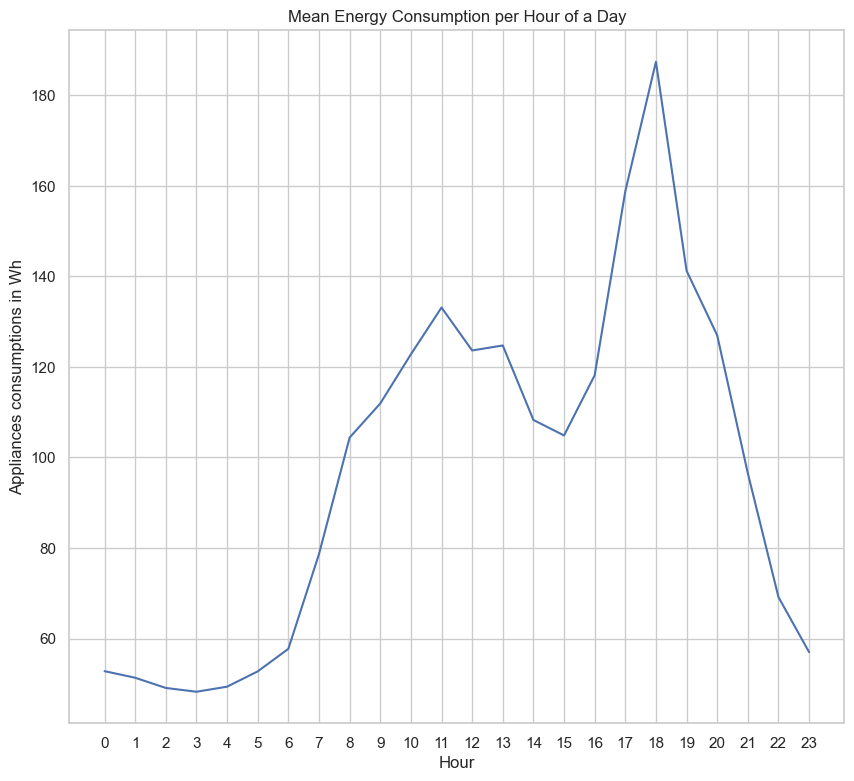

In [37]:
# ploting the hourly consumtion
hourly('appliances').plot(figsize=(10,9))
plt.xlabel('Hour')
plt.ylabel('Appliances consumptions in Wh')
ticks = list(range(0,24,1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

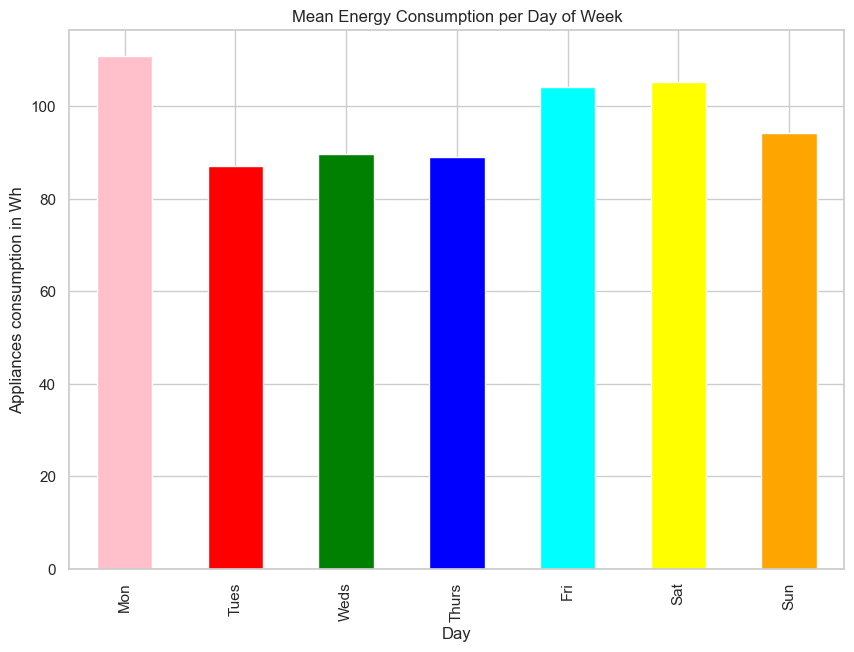

In [41]:
#Weekly Consumption

daily('appliances').plot(kind = 'bar',color=['pink', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange'],figsize=(10,7))
ticks = list(range(0, 7, 1))
labels = "Mon Tues Weds Thurs Fri Sat Sun". split()
plt. xlabel ('Day')
plt.ylabel('Appliances consumption in Wh' )
plt. title( 'Mean Energy Consumption per Day of Week' ) 
plt.xticks(ticks, labels)
plt.show()


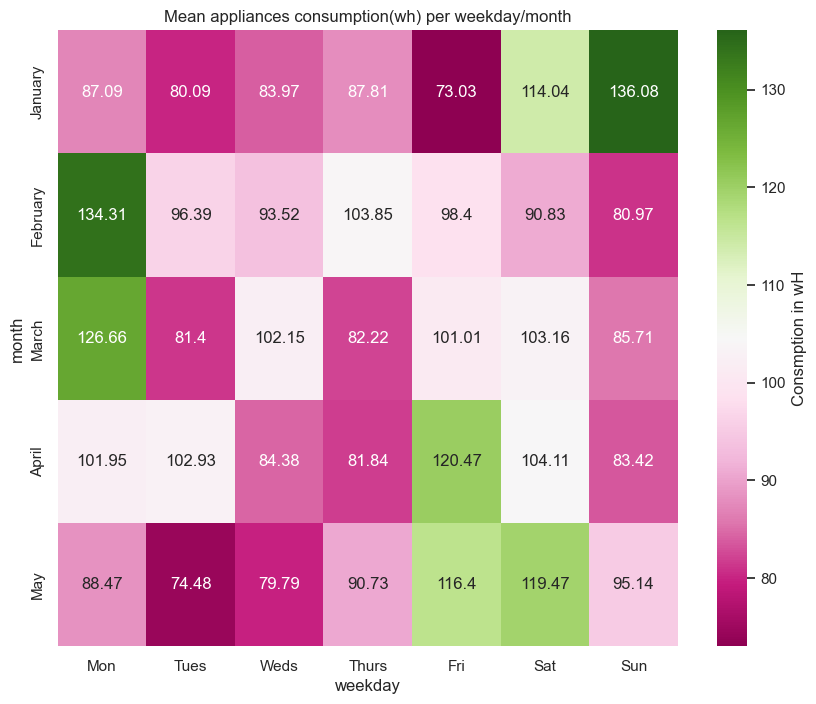

In [42]:
#MOnthly Consumption
sns.set(rc={'figure.figsize': (10,8)},)
ax=sns.heatmap(monthly_daily('appliances').T, cmap="PiYG",
            xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(), 
            yticklabels="January February March April May".split(),
            annot=True ,fmt='g',
            cbar_kws={'label':'Consmption in wH'}).set_title("Mean appliances consumption(wh) per weekday/month")
plt.show()

Text(0.5, 0, 'Appliances\xa0Log(wH)\xa0')

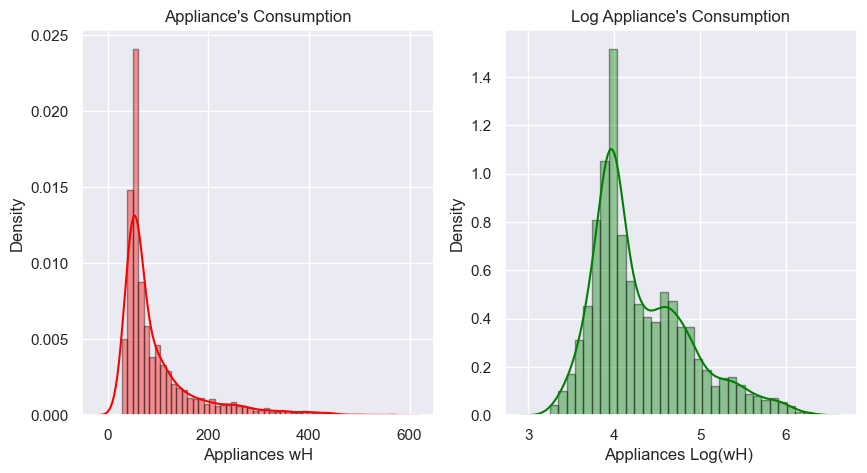

In [43]:
f, axes = plt. subplots(1, 2, figsize=(10,5))

sns.distplot(df_hour.appliances, hist=True, color = 'red', hist_kws={'edgecolor': 'black'},ax=axes [0])
axes[0].set_title("Appliance's Consumption")
axes [0].set_xlabel('Appliances wH')

sns.distplot(df_hour.log_appliances, hist=True, color = 'green', hist_kws={'edgecolor': 'black'},ax=axes [1])
axes[1].set_title("Log Appliance's Consumption")
axes[1].set_xlabel('Appliances Log(wH) ')

In [33]:
# col = ['log_appliances','lights','t1','rh_1','t2','rh_2','t3','rh_3','t4','rh_4','t5','rh_5','t6','rh_6',
#       't7','rh_7','t8','rh_8','t9','rh_9','t_out','press_mm_hg','rh_out','windspeed','visibility','tdewpoint','hour']
# corr = df[col].corr()
# plt.figure(figsize=(18,18))
# sns.set(font_scale=1)
# sns.heatmap(corr, cbar=True, annot=True, cmap='RdYlGn', fmt= '.2f',xticklabels=col, yticklabels=col)
# plt.show()

In [34]:
# col = ['t6','t2','rh_2','lights','hour','t_out','windspeed','tdewpoint']
# sns.set(style= 'ticks',color_codes=True)
# sns.pairplot(df[col])
# plt.show()

**Traing the Model**

In [38]:
for cat_feature in ['weekday','hour']:
    df_hour = pd.concat([df_hour,pd.get_dummies(df_hour[cat_feature])],axis=1)
    df_30min = pd.concat([df_30min,pd.get_dummies(df_30min[cat_feature])],axis=1)
    df = pd.concat([df,pd.get_dummies(df[cat_feature])],axis=1)
    

In [39]:
lin_model = ['low_consum','high_consum','hour','t6','rh_6','lights','windspeed','t6rh6']

In [40]:
df_hour.lights = df_hour.lights.astype(float)
df_hour.log_appliances = df_hour.log_appliances.astype(float)
df_hour.hour = df_hour.hour.astype(float)
df_hour.low_consum = df_hour.low_consum.astype(float)
df_hour.high_consum = df_hour.high_consum.astype(float)
df_hour.t6rh6 = df_hour.t6rh6.astype(float)

In [41]:
test_size=.2
test_index = int (len(df_hour.dropna())*(1-test_size))

X1_train, X1_test = df_hour[lin_model].iloc[:test_index,], df_hour[lin_model].iloc[test_index:,]
y1_train = df_hour.log_appliances.iloc[:test_index,]
y_test = df_hour. log_appliances. iloc[test_index:, ]

In [42]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [55]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X1_train,y1_train)

LinearRegression()

**Model Evaluation**

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict,cross_val_score

In [57]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100 * r2_score(test_labels, predictions)
    accuracy = 100 - mape
    print(model, '\n')
    print('Average Error             : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2        : {:0.2f}% '.format(r_score))
    print('Accuracy                  : {:0.2f}%\n'.format(accuracy))


In [58]:
evaluate(lin_model,X1_test,y_test)

LinearRegression() 

Average Error             : 0.3605 degrees
Variance score R^2        : 11.80% 
Accuracy                  : 91.59%



Model Evaluation

- Average Error             : 0.3605 degrees
- Variance score R^2        : 11.80% 
- Accuracy                  : 91.59%